# 문제 정의 (카드사에서 알고 싶어하는 비밀은 뭘까.... 카드사의 마케팅 전략은 뭘까....)
1. 나이대 별로 카드 이용 고객의 특성은 어떨까?, 그리고 나이대에 맞는 카드 발급 전략은 뭘까?
2. 체크카드 사용자들을 대상으로 신용카드로 옮기게 하려면 어떤 전략을 취해야할까?
3. 신용한도를 늘려야될 대상들에게 푸쉬메세지를 보내고 싶은데.. 어떻게 보내야할까?
4. 카드를 비활성하는 이유는 뭘까..??




In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/. cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (31.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120903 files and direc

In [ ]:
# # 폰트가 선명하게 보이기 위해 - 그래프에 retina display 적용
# # retina 대신 svg 등의 설정을 할 수도 있으며
# # 디스플레이(모니터)가 retina 를 지원해야만 선명한 차이를 볼 수 있습니다.
%config InlineBackend.figure_format = 'retina'
!pip install koreanize-matplotlib

import koreanize_matplotlib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rc('font',family='NanumGothic')
import warnings

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# colab 에서도 아래 설치 문구의 주석을 제거하고 설치하고 import 해주기만 하면 한글폰트가 잘 나옵니다.

from IPython.display import set_matplotlib_formats
# # Window 의 한글 폰트 설정
sns.set(font='NanumGothic')


# df = pd.read_csv("boostcourse-ds-510/data/NHIS_OPEN_GJ_2017.CSV.zip", encoding="cp949")
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949")
# # 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

warnings.filterwarnings(action='ignore')

sns.set_theme(style='whitegrid')
sns.set_palette("twilight")

credit_card = pd.read_csv('/content/drive/MyDrive/BankChurners.csv')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 15.1 MB/s eta 0:00:00


In [ ]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [ ]:
#수치형 데이터, 명목형 데이터로 나누기
credit_card_numerical = credit_card.dtypes[credit_card.dtypes!='object'].index.to_list()
credit_card_object = credit_card.dtypes[credit_card.dtypes=='object'].index.to_list()

print('Numerical Data types: ', len(credit_card_numerical))
print('Numerical Data types: ', len(credit_card_object))

Numerical Data types:  17
Numerical Data types:  6


# 데이터 특성 보기(간략하게)

In [ ]:
credit_card.head()

credit_card = credit_card.rename(columns={'CLIENTNUM':'고객넘버',
                                          'Attrition_Flag':'이탈여부',
                                          'Customer_Age':'고객나이',
                                          'Gender':'성별',
                                          'Dependent_count':'부양가족수',
                                          'Education_Level':'학력',
                                          'Marital_Status':'결혼여부',
                                          'Income_Category':'소득유형',
                                          'Card_Category':'카드유형',
                                          'Months_on_book':'은행가입기간',
                                          'Total_Revolving_Bal':'전체리볼빙상환액',
                                          'Total_Relationship_Count':'보유은행상품수',
                                          'Months_Inactive_12_mon':'비활성개월수',
                                          'Contacts_Count_12_mon':'은행컨택횟수',
                                          'Credit_Limit':'신용한도',
                                          'Total_Trans_Amt':'총거래금액',
                                          'Avg_Utilization_Ratio':'평균카드사용률',
                                          'Avg_Open_To_Buy':'신용한도넘은금액'
                                          }).drop(columns=['Total_Amt_Chng_Q4_Q1','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])


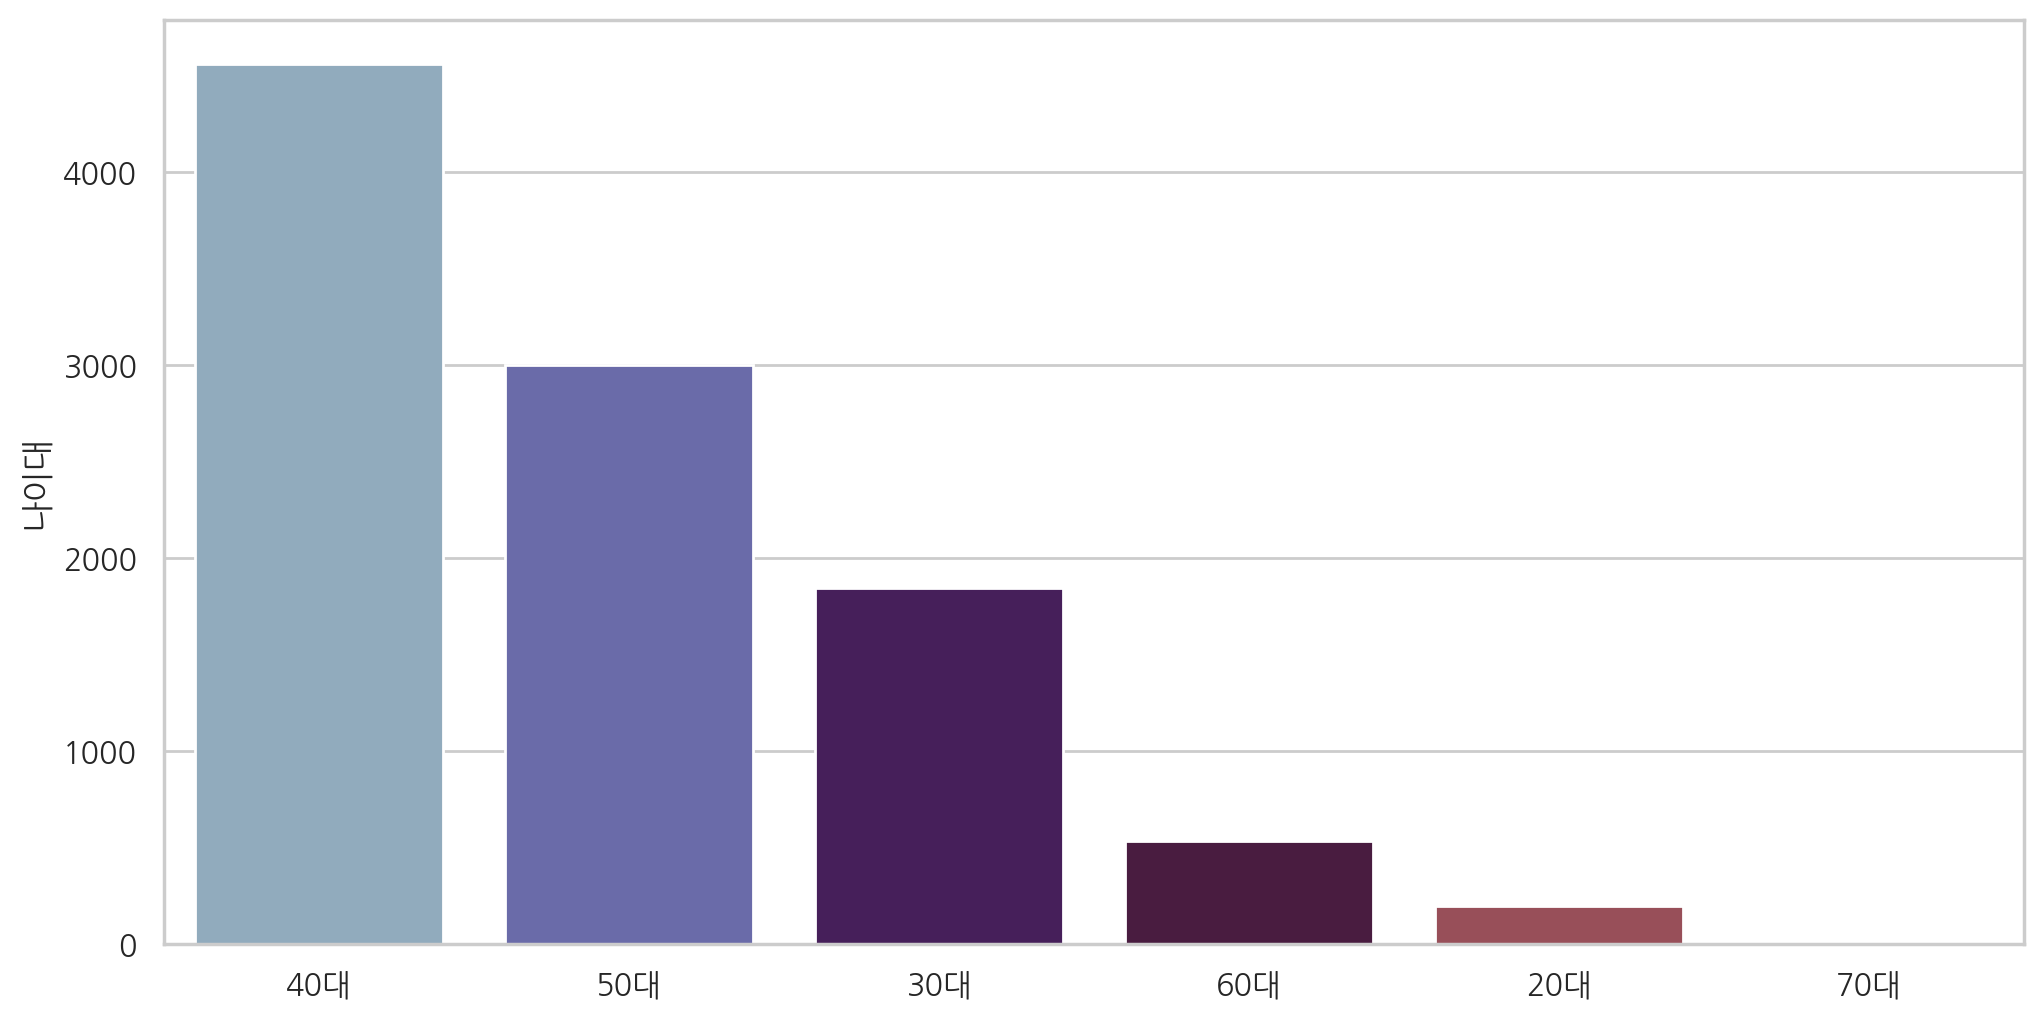

In [ ]:
#고객 나이대 별 분류 카운트 수 (경제력이 있는 30>40>50>60대)
def make_groups(x):
  if x<30:
    return '20대'
  elif 30<=x<40:
    return '30대'
  elif 40<=x<50:
    return '40대'
  elif 50<=x<60:
    return '50대'
  elif 60<=x<70:
    return '60대'
  else:
    return '70대'



credit_card['나이대'] = credit_card['고객나이'].apply(make_groups)
age = credit_card['나이대'].value_counts().to_frame()
plt.figure(figsize=(12,6))
plt.rc('font', family='NanumGothic')
sns.barplot(data=age, x=age.index, y=age['나이대'])
plt.show()

In [ ]:
#70대 이상은 2명 밖에 없기 때문에 제거
credit_card = credit_card[~(credit_card['나이대']=='70대')]

In [ ]:
pd.set_option('float_format','{:.5f}'.format)
credit_card.describe()

,고객넘버,이탈여부,고객나이,부양가족수,은행가입기간,보유은행상품수,비활성개월수,은행컨택횟수,신용한도,전체리볼빙상환액,신용한도넘은금액,총거래금액,평균카드사용률
count,10125.00000,10125.00000,10125.00000,10125.00000,10125.00000,10125.00000,10125.00000,10125.00000,10125.00000,10125.00000,10125.00000,10125.00000,10125.00000
mean,739175142.50370,0.83931,46.32099,2.34667,35.92642,3.81254,2.34114,2.45531,8632.89621,1162.78499,7470.11122,4404.66074,0.27488
std,36903601.28824,0.36726,8.00977,1.29862,7.98471,1.55450,1.01070,1.10631,9089.42287,815.06106,9091.31347,3397.21676,0.27571
min,708082083.00000,0.00000,26.00000,0.00000,13.00000,1.00000,0.00000,0.00000,1438.30000,0.00000,3.00000,510.00000,0.00000
25%,713036208.00000,1.00000,41.00000,1.00000,31.00000,3.00000,2.00000,2.00000,2555.00000,357.00000,1324.00000,2156.00000,0.02300
50%,717926358.00000,1.00000,46.00000,2.00000,36.00000,4.00000,2.00000,2.00000,4549.00000,1276.00000,3475.00000,3900.00000,0.17500
75%,773140683.00000,1.00000,52.00000,3.00000,40.00000,5.00000,3.00000,3.00000,11068.00000,1784.00000,9861.00000,4741.00000,0.50300
max,828343083.00000,1.00000,68.00000,5.00000,56.00000,6.00000,6.00000,6.00000,34516.00000,2517.00000,34516.00000,18484.00000,0.99900


# 기초 EDA

1.고객 나이대 별 분류 카운트 수 (경제력이 있는 30>40>50>60대)

2.이탈여부 (사용 고객 > 이탈 고객)

3.성별 (여성>남성)

4.평균적인 카드 사용률은 어떻게 되는가? (70>20>60>30>50>40, 신용카드 보유 고객 나이대의 역순)

5.평균 은행가입기간은 어떻게 되는가? (70>20>60>30>50>40, 신용카드 보유 고객 나이대의 역순)

6.나이대에 따른 소득 유형

7.나이대에 따른 신용카드 이탈여부정도

8.나이대와 총 거래 금액

9.나이대와 신용한도

10.나이대에 따른 고객 수와 고객이탈 정도(%)


In [ ]:
#고객 나이대 별 분류 카운트 수 (경제력이 있는 30>40>50>60대)
#이탈여부 (사용 고객 > 이탈 고객)
#성별 (여성>남성)
#평균적인 카드 사용률은 어떻게 되는가? (70>20>60>30>50>40, 신용카드 보유 고객 나이대의 역순)
#평균 은행가입기간은 어떻게 되는가? (70>20>60>30>50>40, 신용카드 보유 고객 나이대의 역순)


age = credit_card['나이대'].value_counts().to_frame()
card_exists = credit_card['이탈여부'].value_counts().to_frame()
gendercount = credit_card['성별'].value_counts().to_frame()
mean_used = credit_card.groupby('나이대')['평균카드사용률'].mean().sort_values().to_frame()
mean_bank = credit_card.groupby('나이대')['은행가입기간'].mean().sort_values(ascending=False).to_frame()
wage_age = credit_card.groupby('나이대')['소득유형'].value_counts().to_frame().rename(columns={'소득유형':'빈도'}).reset_index()
attriment = credit_card.groupby('나이대')['이탈여부'].value_counts().to_frame().rename(columns={'이탈여부':'빈도'})

상관관계 히트맵 해석
1. 고객 나이와 은행가입기간의 상관관계계수가 양의 상관관계로, 계수가 높다(0.6 이상)
2. 평균카드사용률과 리볼빙상환액의 상관관계계수가 양의 상관관계로, 계수가 높다(0.6 이상)
3. 보유은행상품수와 총거래금액의 상관관계계수가 음의 상관관계로, 계수가 낮다(-0.4 이하)
4. 신용한도와 평균카드사용률을 상관관계계수가 음의 상관관계로, 계수가 매우 낮다(-0.4이하)
5. 이탈여부는 은행컨택횟수와 음의 상관관계로, 계수가 낮다.(-0.3 이하)
5. 이탈여부는 비활성개월수와 음의 상관관계로, 계수가 낮다.(-0.2 이하)

리볼빙 상환액 상관계수:
1. 평균카드사용률과 양의 상관관계를 띄고 있다
2. 총거래금액과 양의 상관관계를 띄고 있다

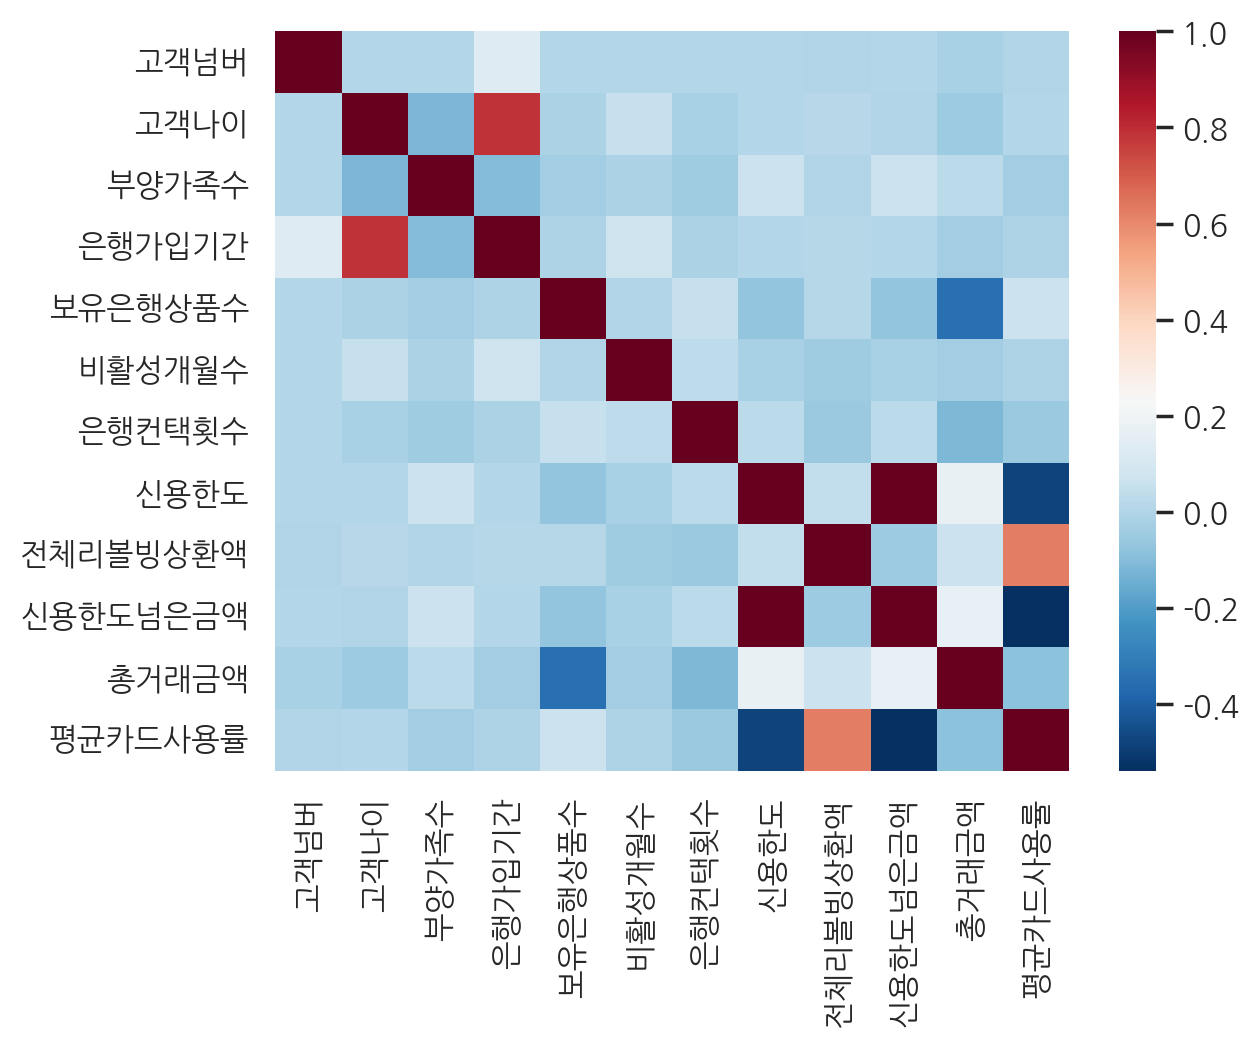

In [ ]:
#상관관계 히트맵
corelation = credit_card.corr()
sns.heatmap(corelation,fmt='g', cmap='RdBu_r', cbar=True)
plt.show()

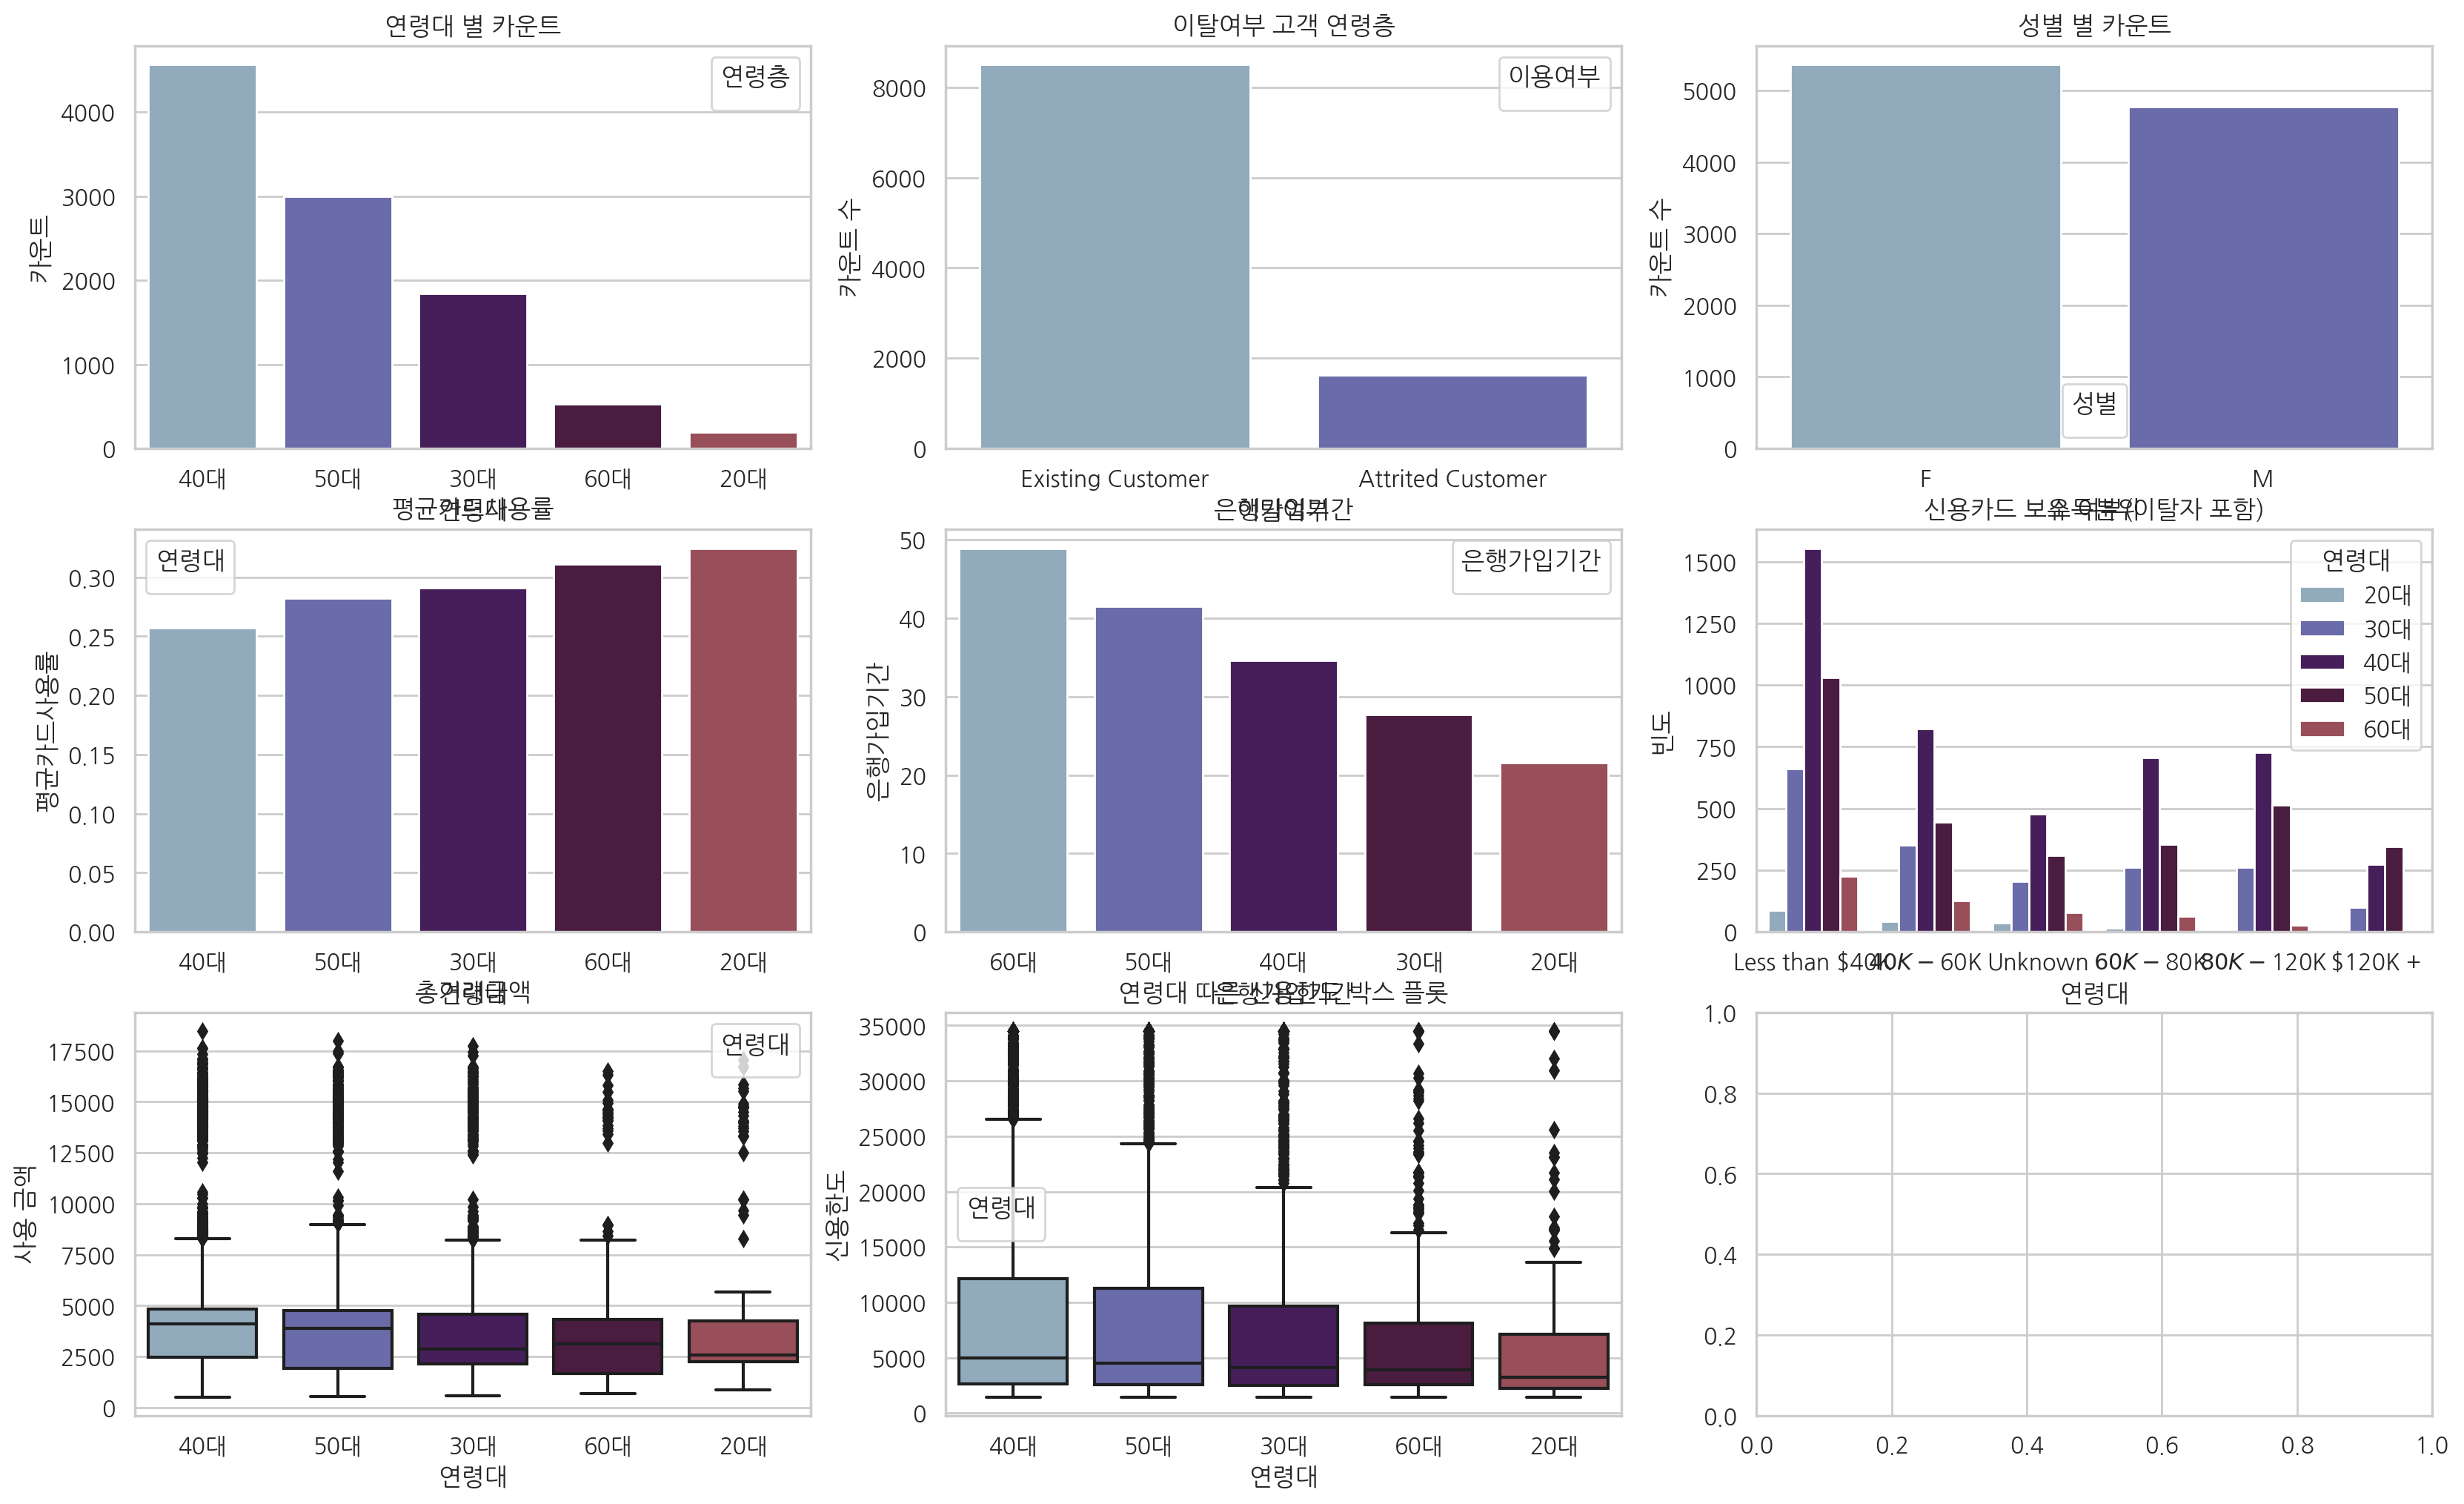

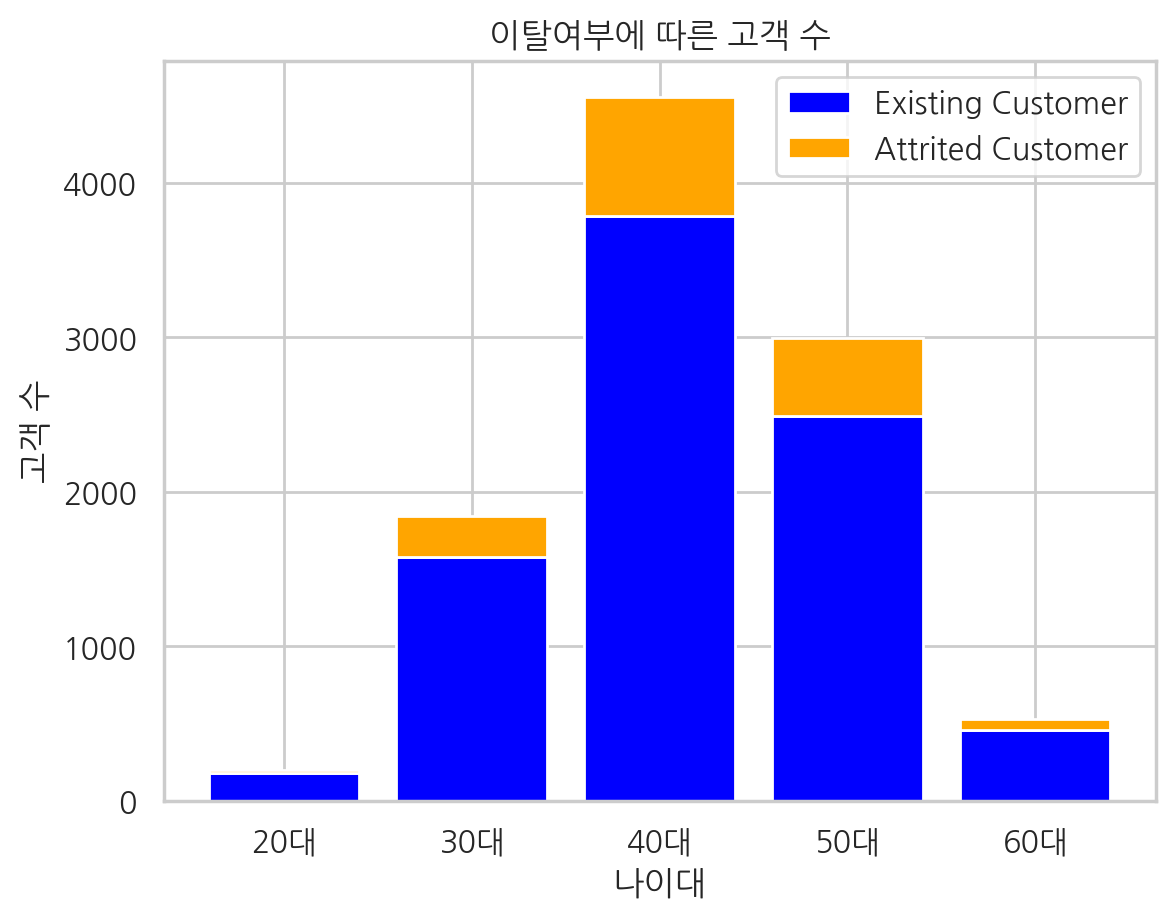

In [ ]:
#객체 지향 방식의 코드 (배경을 먼저 설정해놓고 간다, AXS는 데이터가 포함되는 공간을 의미함, ncol은 열을 몇개로 할 것인가?)
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 12))

# 첫 번째 서브플롯
ax1 = axs[0][0]
sns.barplot(data=age, x=age.index, y=age['나이대'].values, ax=ax1)
ax1.set_title('연령대 별 카운트')
ax1.set_xlabel('연령대')
ax1.set_ylabel('카운트')
ax1.legend(title='연령층')

# 두 번째 서브플롯
ax2 = axs[0][1]
sns.barplot(data=card_exists, x=card_exists['이탈여부'].index, y=card_exists['이탈여부'].values, ax=ax2)
ax2.set_title('이탈여부 고객 연령층')
ax2.set_xlabel('이탈여부')
ax2.set_ylabel('카운트 수')
ax2.legend(title='이용여부')

# 세 번째 서브플롯
ax3 = axs[0][2]
sns.barplot(data=gendercount, x=gendercount['성별'].index, y=gendercount['성별'].values, ax=ax3)
ax3.set_title('성별 별 카운트')
ax3.set_xlabel('신용카드 보유 여부(이탈자 포함)')
ax3.set_ylabel('카운트 수')
ax3.legend(title='성별')

# 네 번째 서브플롯
ax4 = axs[1][0]
sns.barplot(data=mean_used, x=mean_used['평균카드사용률'].index, y=mean_used['평균카드사용률'].values, ax=ax4)
ax4.set_title('평균카드사용률')
ax4.set_xlabel('연령대')
ax4.set_ylabel('평균카드사용률')
ax4.legend(title='연령대')

# 다섯번째 서브플롯
ax5 = axs[1][1]
sns.barplot(data=mean_bank,x=mean_bank['은행가입기간'].index, y=mean_bank['은행가입기간'].values, ax=ax5)
ax5.set_title('은행가입기간')
ax5.set_xlabel('은행가입기간')
ax5.set_ylabel('은행가입기간')
ax5.legend(title='은행가입기간')

# 여섯번째 서브플롯
ax6 = axs[1][2]
sns.barplot(data=wage_age,x='소득유형', y='빈도',hue='나이대', ax=ax6)
ax6.set_title('소득분위')
ax6.set_xlabel('연령대')
ax6.set_ylabel('빈도')
ax6.legend(title='연령대')

# 일곱번째 서브플롯
ax7 = axs[2][0]
sns.boxplot(data=credit_card,x='나이대', y='총거래금액', ax=ax7)
ax7.set_title('총거래금액')
ax7.set_xlabel('연령대')
ax7.set_ylabel('사용 금액')
ax7.legend(title='연령대')


# 여덟번째 서브플롯
ax8 = axs[2][1]
sns.boxplot(data=credit_card,x='나이대', y='신용한도', ax=ax8)
ax8.set_title('연령대 따른 신용한도 박스 플롯')
ax8.set_xlabel('연령대')
ax8.set_ylabel('신용한도')
ax8.legend(title='연령대')

# 이탈여부 데이터
ages = ['20대', '30대', '40대', '50대', '60대']
existing_customers = [178, 1580, 3789, 2492, 459]
attrited_customers = [17, 261, 772, 506, 71]

# 누적막대그래프 생성
fig, ax = plt.subplots()
ax.bar(ages, existing_customers, label='Existing Customer', color='blue')
ax.bar(ages, attrited_customers, bottom=existing_customers, label='Attrited Customer', color='orange')

# 그래프에 레이블 추가
ax.set_xlabel('나이대')
ax.set_ylabel('고객 수')
ax.set_title('이탈여부에 따른 고객 수')

# 범례 추가
ax.legend()

# 그래프 표시
plt.show()

In [ ]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10125 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   고객넘버      10125 non-null  int64  
 1   이탈여부      10125 non-null  object 
 2   고객나이      10125 non-null  int64  
 3   성별        10125 non-null  object 
 4   부양가족수     10125 non-null  int64  
 5   학력        10125 non-null  object 
 6   결혼여부      10125 non-null  object 
 7   소득유형      10125 non-null  object 
 8   카드유형      10125 non-null  object 
 9   은행가입기간    10125 non-null  int64  
 10  보유은행상품수   10125 non-null  int64  
 11  비활성개월수    10125 non-null  int64  
 12  은행컨택횟수    10125 non-null  int64  
 13  신용한도      10125 non-null  float64
 14  전체리볼빙상환액  10125 non-null  int64  
 15  신용한도넘은금액  10125 non-null  float64
 16  총거래금액     10125 non-null  int64  
 17  평균카드사용률   10125 non-null  float64
 18  나이대       10125 non-null  object 
dtypes: float64(3), int64(9), object(7)
memory usage: 1.5+ MB


In [ ]:
#연령대 별 데이터 생성
credit_20g = credit_card[(credit_card['고객나이']>=20) & (credit_card['고객나이']<30)]
credit_30g = credit_card[(credit_card['고객나이']>=30) & (credit_card['고객나이']<40)]
credit_40g = credit_card[(credit_card['고객나이']>=40) & (credit_card['고객나이']<50)]
credit_50g = credit_card[(credit_card['고객나이']>=50) & (credit_card['고객나이']<60)]
credit_60g = credit_card[(credit_card['고객나이']>=60) & (credit_card['고객나이']<70)]

In [ ]:
#학력에 따라 평균 신용한도 차이가 있나?
#언에듀가 왜케 신용이 높아
print(credit_20g.groupby('학력')['신용한도'].mean().sort_values())

학력
High School      4982.770732
College          5035.156000
Graduate         6312.758491
Unknown          6880.363636
Post-Graduate    6980.664706
Uneducated       7721.380769
Name: 신용한도, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x7cdce29f8730>,
 'caps': [<matplotlib.lines.Line2D at 0x7cdce29f9030>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cdce29c0f70>],
 'medians': [<matplotlib.lines.Line2D at 0x7cdce29f9570>],
 'fliers': [<matplotlib.lines.Line2D at 0x7cdce29f9810>],
 'means': []}

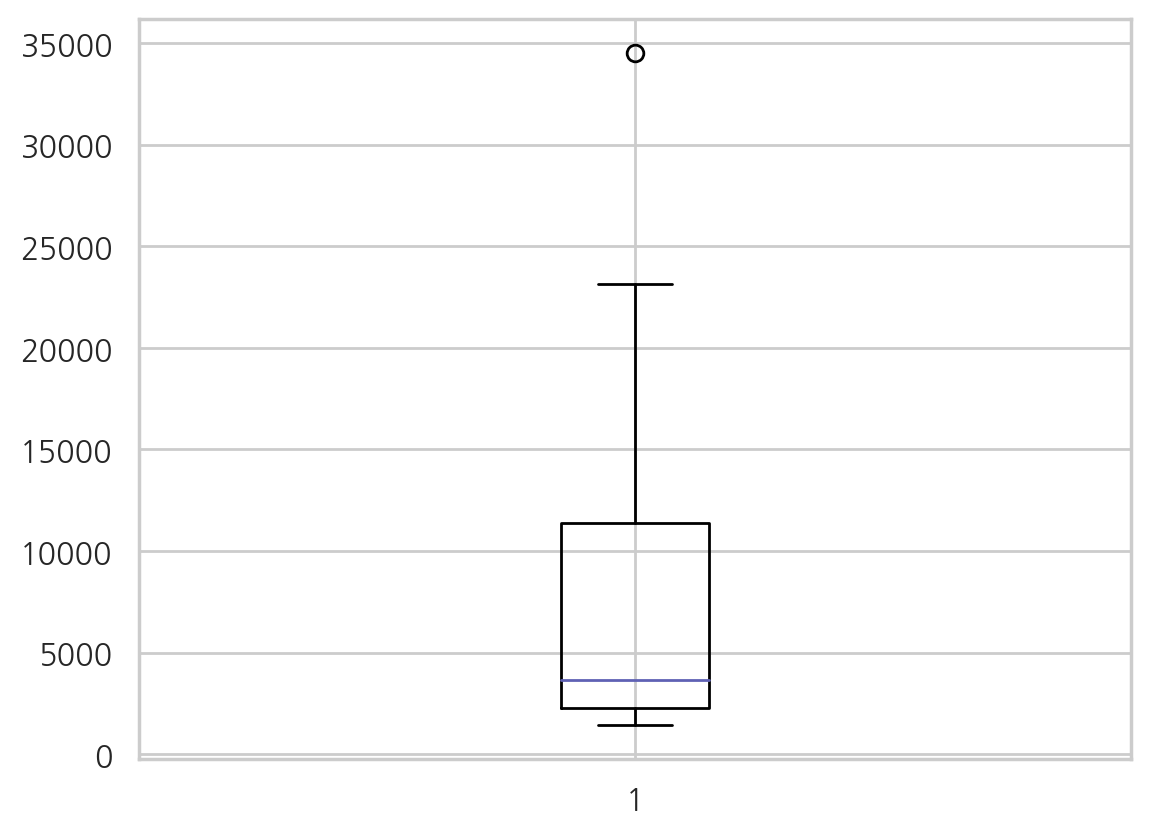

In [ ]:
#boxplot을 보니, uneducated인 사람들의 중위수는 3000에 수렴하고 있으나, 자금이 많은 몇명의 사람들이 평균 신용한도를 높이고 있음을 알 수 있음. unedu가 몇 명 있지도 않음.
plt.boxplot(credit_20g.loc[credit_20g['학력']=='Uneducated','신용한도'])

In [ ]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   고객넘버      10127 non-null  int64  
 1   이탈여부      10127 non-null  object 
 2   고객나이      10127 non-null  int64  
 3   성별        10127 non-null  object 
 4   부양가족수     10127 non-null  int64  
 5   학력        10127 non-null  object 
 6   결혼여부      10127 non-null  object 
 7   소득유형      10127 non-null  object 
 8   카드유형      10127 non-null  object 
 9   은행가입기간    10127 non-null  int64  
 10  보유은행상품수   10127 non-null  int64  
 11  비활성개월수    10127 non-null  int64  
 12  은행컨택횟수    10127 non-null  int64  
 13  신용한도      10127 non-null  float64
 14  전체리볼빙상환액  10127 non-null  int64  
 15  신용한도넘은금액  10127 non-null  float64
 16  총거래금액     10127 non-null  int64  
 17  평균카드사용률   10127 non-null  float64
 18  나이대       10127 non-null  object 
dtypes: float64(3), int64(9), object(7)
memory usage: 1.5+ MB


# 카드를 비활성하는 이유는 뭘까..?? (이탈하는 이유는 뭘까..)


1. 리볼빙 금액을 못 갚은 것 아닐까?? 카드 리볼빙에 대한 부담이 너무 컸던 것 아닐까?
2. 은행의 비활성개월수의 수가 크지 않을까?
3. 평균 카드 사용률이 낮지 않을까?
4. 소득유형이 낮아서 카드를 비활성화 하지 않을까?

#1. 리볼빙 금액을 못 갚은 것 아닐까?? 카드 리볼빙에 대한 부담이 너무 컸던 것 아닐까
리볼빙 == 카드에서 쓴 금액을 일정 금액만 변제하고 이번달에 갚는 것이 아닌 이월하여 다음달에 갚는 제도

In [ ]:
#신용카드 비이탈자들과 이탈자들을 추려낸 데이터프레임
exist = credit_card[credit_card['이탈여부']=='Existing Customer']
attrited = credit_card[credit_card['이탈여부']=='Attrited Customer']

exist = exist.drop(columns=['고객넘버'])
attrited = attrited.drop(columns=['고객넘버'])

In [ ]:
attrited_table = attrited.groupby('나이대')[['부양가족수','은행가입기간','보유은행상품수','비활성개월수','은행컨택횟수','신용한도','전체리볼빙상환액','총거래금액']].mean()
exist_table = exist.groupby('나이대')[['부양가족수','은행가입기간','보유은행상품수','비활성개월수','은행컨택횟수','신용한도','전체리볼빙상환액','총거래금액']].mean()

<Axes: >

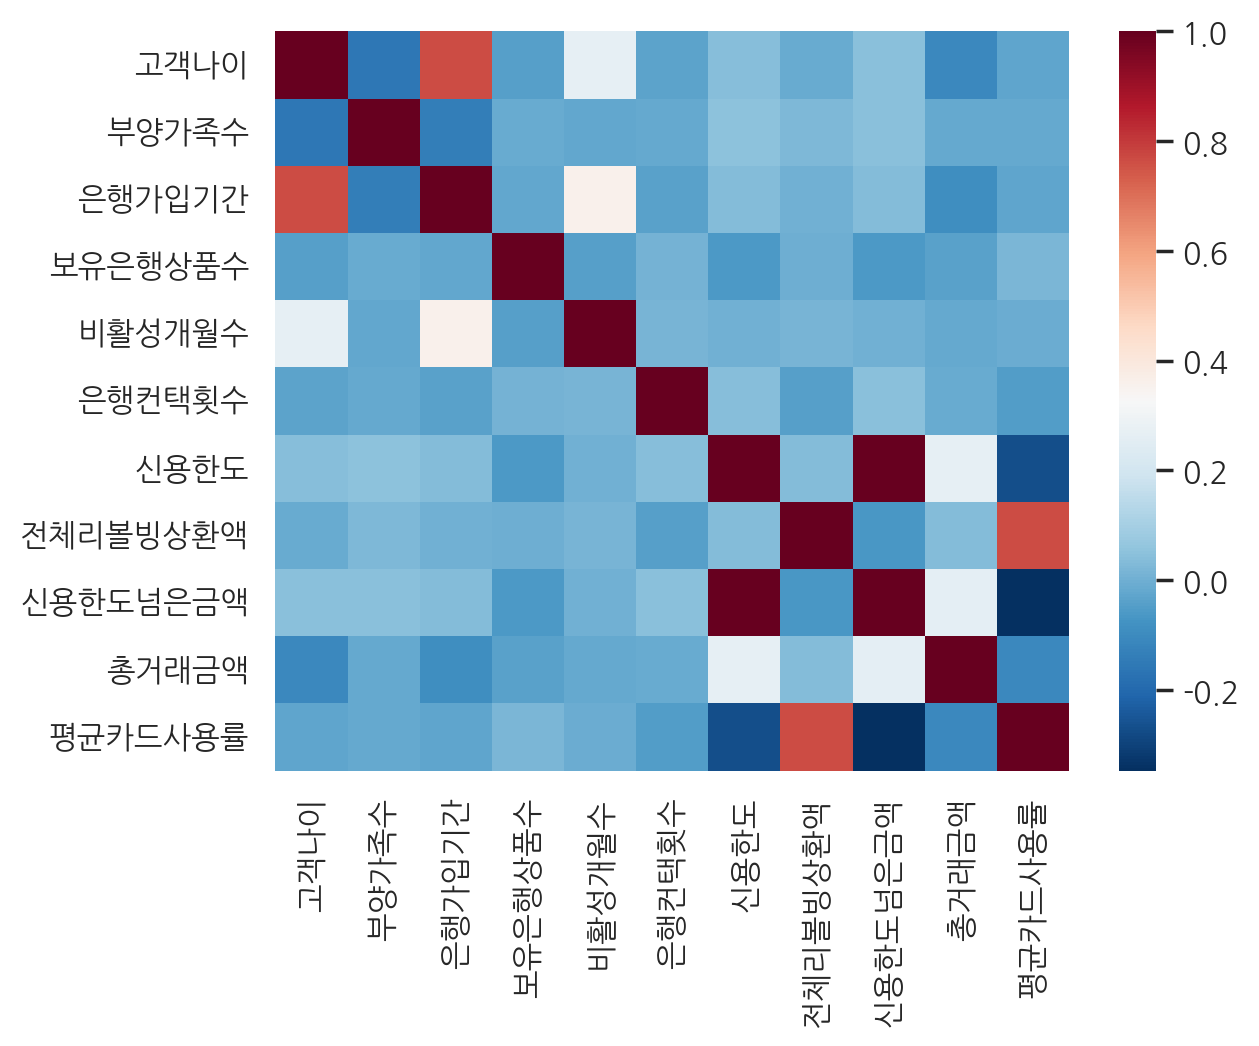

In [ ]:
#이탈자 표본들을 토대로 히트맵 확인
attrited_corr = attrited.corr()
sns.heatmap(attrited_corr, cmap='RdBu_r')

히트맵 결과

  1. 은행가입기간과 고객나이는 양의 상관관계를 띈다. (좀 당연하지 않나, 고객 나이가 많을수록 은행가입기간이 길겠지,, 가입한지 오래됐으니까..)

  2. 평균카드사용률과 전체리볼빙상환액은 양의 상관관계를 띈다. (카드를 많이 사용할수록 리볼빙상환액이 많았다.)

  3. 평균카드사용률과 신용한도넘은금액은 음의 상관관계를 띈다. (카드사용률이 높을수록 신용한도넘은금액이 적다?)

히트맵을 보고 다음 분석할 것

  1. 평균카드사용률도 높으면 전체리볼빙상환액이 높은가?
  2. 이탈자들은 한도 대비 전체리볼빙상환액이 높을 것이다.
  3.

이탈에 왠지 리볼빙이 중요할 것 같아서, 봤는데 평균카드사용률이 높은 사람들이 리볼빙상환액이 높았다.

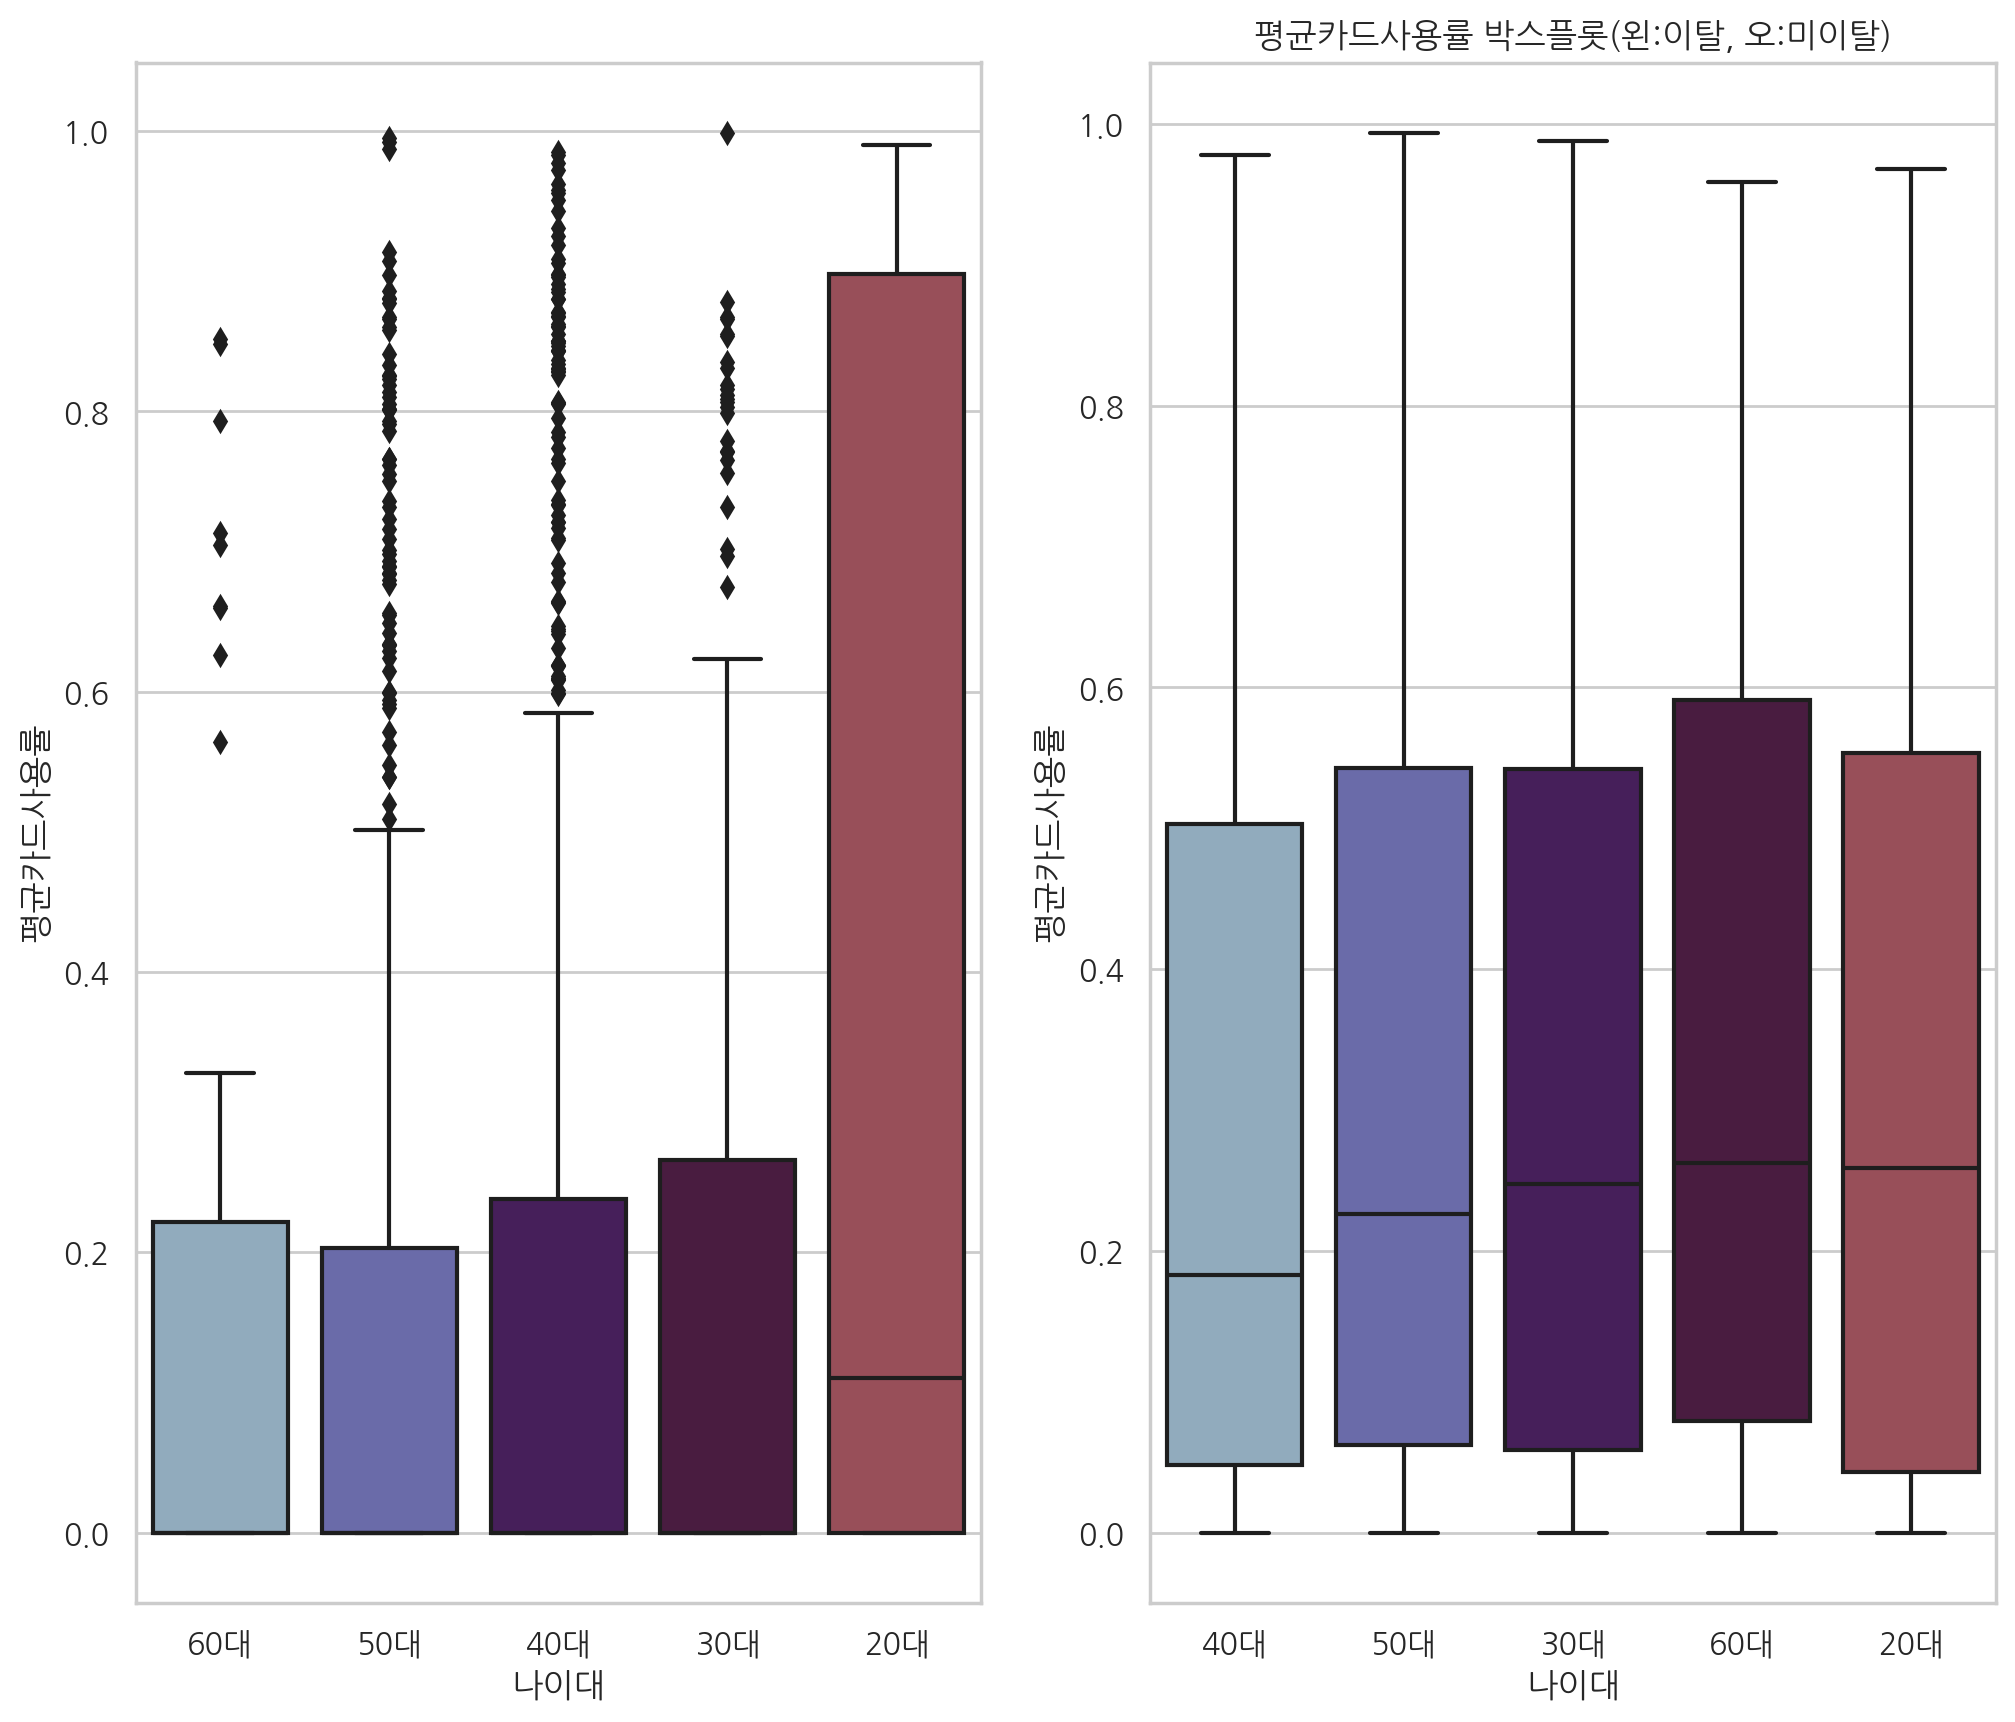

In [ ]:
#평균카드사용률 박스플롯

plt.figure(figsize=(12,10))
plt.subplot(1,2,1)
sns.boxplot(data=attrited, x='나이대',y='평균카드사용률')
plt.subplot(1,2,2)
sns.boxplot(data=exist, x='나이대',y='평균카드사용률')
plt.title('평균카드사용률 박스플롯(왼:이탈, 오:미이탈)')
plt.show()

BOX PLOT 해석
1. 이탈자 박스 플롯의 경우 20대의 이탈자 표본이 몇명 되지 않기 때문에, 박스플롯에서 카드 사용률이 0에서 1까지 구성되는 경우를 보였다. 뿐만 아니라, 30~60대는 박스플롯에서 중간값을 보이지 않았다.
2. 그럼에도 불구하고, 이탈자들은 평균카드사용률이 미이탈자들에 비해서 현저히 낮음을 볼 수 있었다.

In [ ]:
#boxplot가 이상(중간값 선이 없고, 박스플롯의 아래쪽 수염이 없음) 해서 describe로 확인해보기 -> 확인해보니 75% 전까지는 사용률이 0프로임을 확인
print(exist['평균카드사용률'].describe())
print(attrited['평균카드사용률'].describe())

count    8500.000000
mean        0.296412
std         0.272568
min         0.000000
25%         0.055000
50%         0.211000
75%         0.529250
max         0.994000
Name: 평균카드사용률, dtype: float64
count    1627.000000
mean        0.162475
std         0.264458
min         0.000000
25%         0.000000
50%         0.000000
75%         0.231000
max         0.999000
Name: 평균카드사용률, dtype: float64


In [ ]:
# ?? 평균카드사용률 0프로인 사람들이 많아서 봤더니,, 0프로인 사람들 비중이 11프로나 되는데 ... 데이터가 이상한듯싶음.. 상위 25% 비중도 0?..

print('미이탈자들의  평균카드사용률 0% 비율: ',round(len(exist[exist['평균카드사용률']==0])/len(exist),2))
print('미이탈자들 수: ',len(exist))
print('이탈자들의  평균카드사용률 0% 비율: ',round(len(attrited[attrited['평균카드사용률']==0])/len(exist),2))
print('이탈자들 수: ',len(attrited))

미이탈자들의  평균카드사용률 0% 비율:  0.19
미이탈자들 수:  8500
이탈자들의  평균카드사용률 0% 비율:  0.11
이탈자들 수:  1627


In [ ]:
#집단 간 평균카드사용률의 차이가 유의미한 지 검증하기 위해서 t-test 시행
#집단 간 평균카드사용률의 t-test를 진행해본 결과 p-value값이 높아서 유의미하지 않은 것이 검증됨.
#pvalue가 높은 이유는 여러가지가 있을 수 있지만, 독립표본 검증을 했기 때문인 것 같음. 독립표본 t-test는 두 집단이 서로 다른 모집단에서 추출된 독립된 두 집단의 평균 차이를 검증하는 것인데, 여기서는 같은 집단에서 추출된 평균의 차이를 검정했음. (아님)

# -->> 종속표본 t검정, 종속표본 t검정은 비교하려는 두 집단이 같은 모집단에서 추출되었을 때 두 집단의 평균 차이를 검증하는 방법


from scipy.stats import stats

print('집단 간 평균카드사용률의 t-test 결과: ', stats.ttest_ind(exist['평균카드사용률'],attrited['평균카드사용률'], equal_var=True))

집단 간 평균카드사용률의 t-test 결과:  TtestResult(statistic=18.24120613610603, pvalue=3.587353332037558e-73, df=10123.0)


결과: pvalue 값이 0.05 이하인 것을 보아 미이탈자 집단과 이탈자 집단의 평균 차이가 다르다고 볼 수 있다. (대립가설 채택)

나이대
20대    1085.470588
30대     663.827586
40대     685.874352
50대     652.596838
60대     609.323944
Name: 전체리볼빙상환액, dtype: float64 나이대
20대    1110.410112
30대    1267.215190
40대    1228.608604
50대    1294.445425
60대    1302.191721
70대    1310.000000
Name: 전체리볼빙상환액, dtype: float64


<Axes: xlabel='나이대', ylabel='전체리볼빙상환액'>

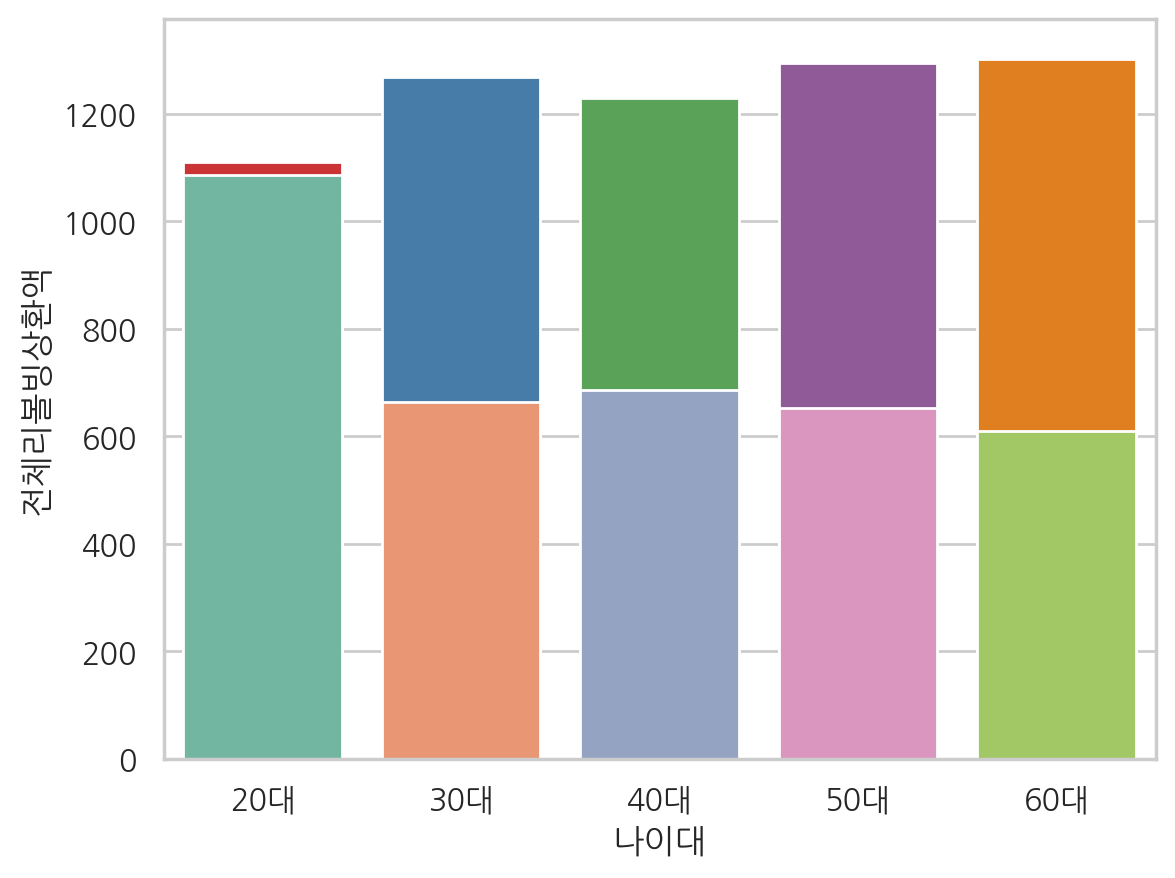

In [ ]:
#신용카드 이탈자와 신용카드 미이탈자와 연령대에 따른 리볼빙 금액은 차이가 확연했다. 20대는 표본이 없기 때문에 엇비슷한 경향을 보였으나, 30대~60대는 리볼빙 상환액의 차이가 심한 경향을 보였다.
print(attrited_table['전체리볼빙상환액'], exist_table['전체리볼빙상환액'])
sns.barplot(data=exist_table, x=exist_table.index, y=exist_table['전체리볼빙상환액'], palette='Set1')
sns.barplot(data=attrited_table, x=attrited_table.index, y=attrited_table['전체리볼빙상환액'], palette='Set2')

신용카드에서 이탈하는 사람들이 신용카드에서 이탈하지 않는 사람들보다 전체리볼빙상환액이 더 적다. (빚을 못갚았다는 의미)

->1. 카드 리볼빙을 크게 하지 못한 이유는 전반적으로 이탈자들의 소득이 적어서일 것이다.

->2. 카드 리볼빙을 크게 하지 못한 이유는 고객나이가 높아서 카드 리볼빙 금액을 갚지 못할 것이기 떄문이다.

->3. 카드 리볼빙상환을 많이 하지 않은 사람들은 은행컨택횟수를 여러 번 하지 않았을 것이다. (왜냐하면 돈을 갚아야하기 때문이기 떄문)

In [ ]:
#집단 간 전체리볼빙상환액의 차이가 유의미한 지 검증하기 위해서 t-test 시행

from scipy.stats import stats

print('집단 간 평균카드사용률의 t-test 결과: ', stats.ttest_ind(exist['전체리볼빙상환액'],attrited['전체리볼빙상환액'], equal_var=True))


집단 간 평균카드사용률의 t-test 결과:  TtestResult(statistic=27.43176603515889, pvalue=7.29827082207797e-160, df=10123.0)


결과: pvalue 값이 0.05 이하인 것을 보아 미이탈자 집단과 이탈자 집단의 전체리볼빙상환액 차이가 유의미하다고 볼 수 있다. (대립가설 채택)

In [ ]:
print(len(attrited), len(exist))

1627 8498


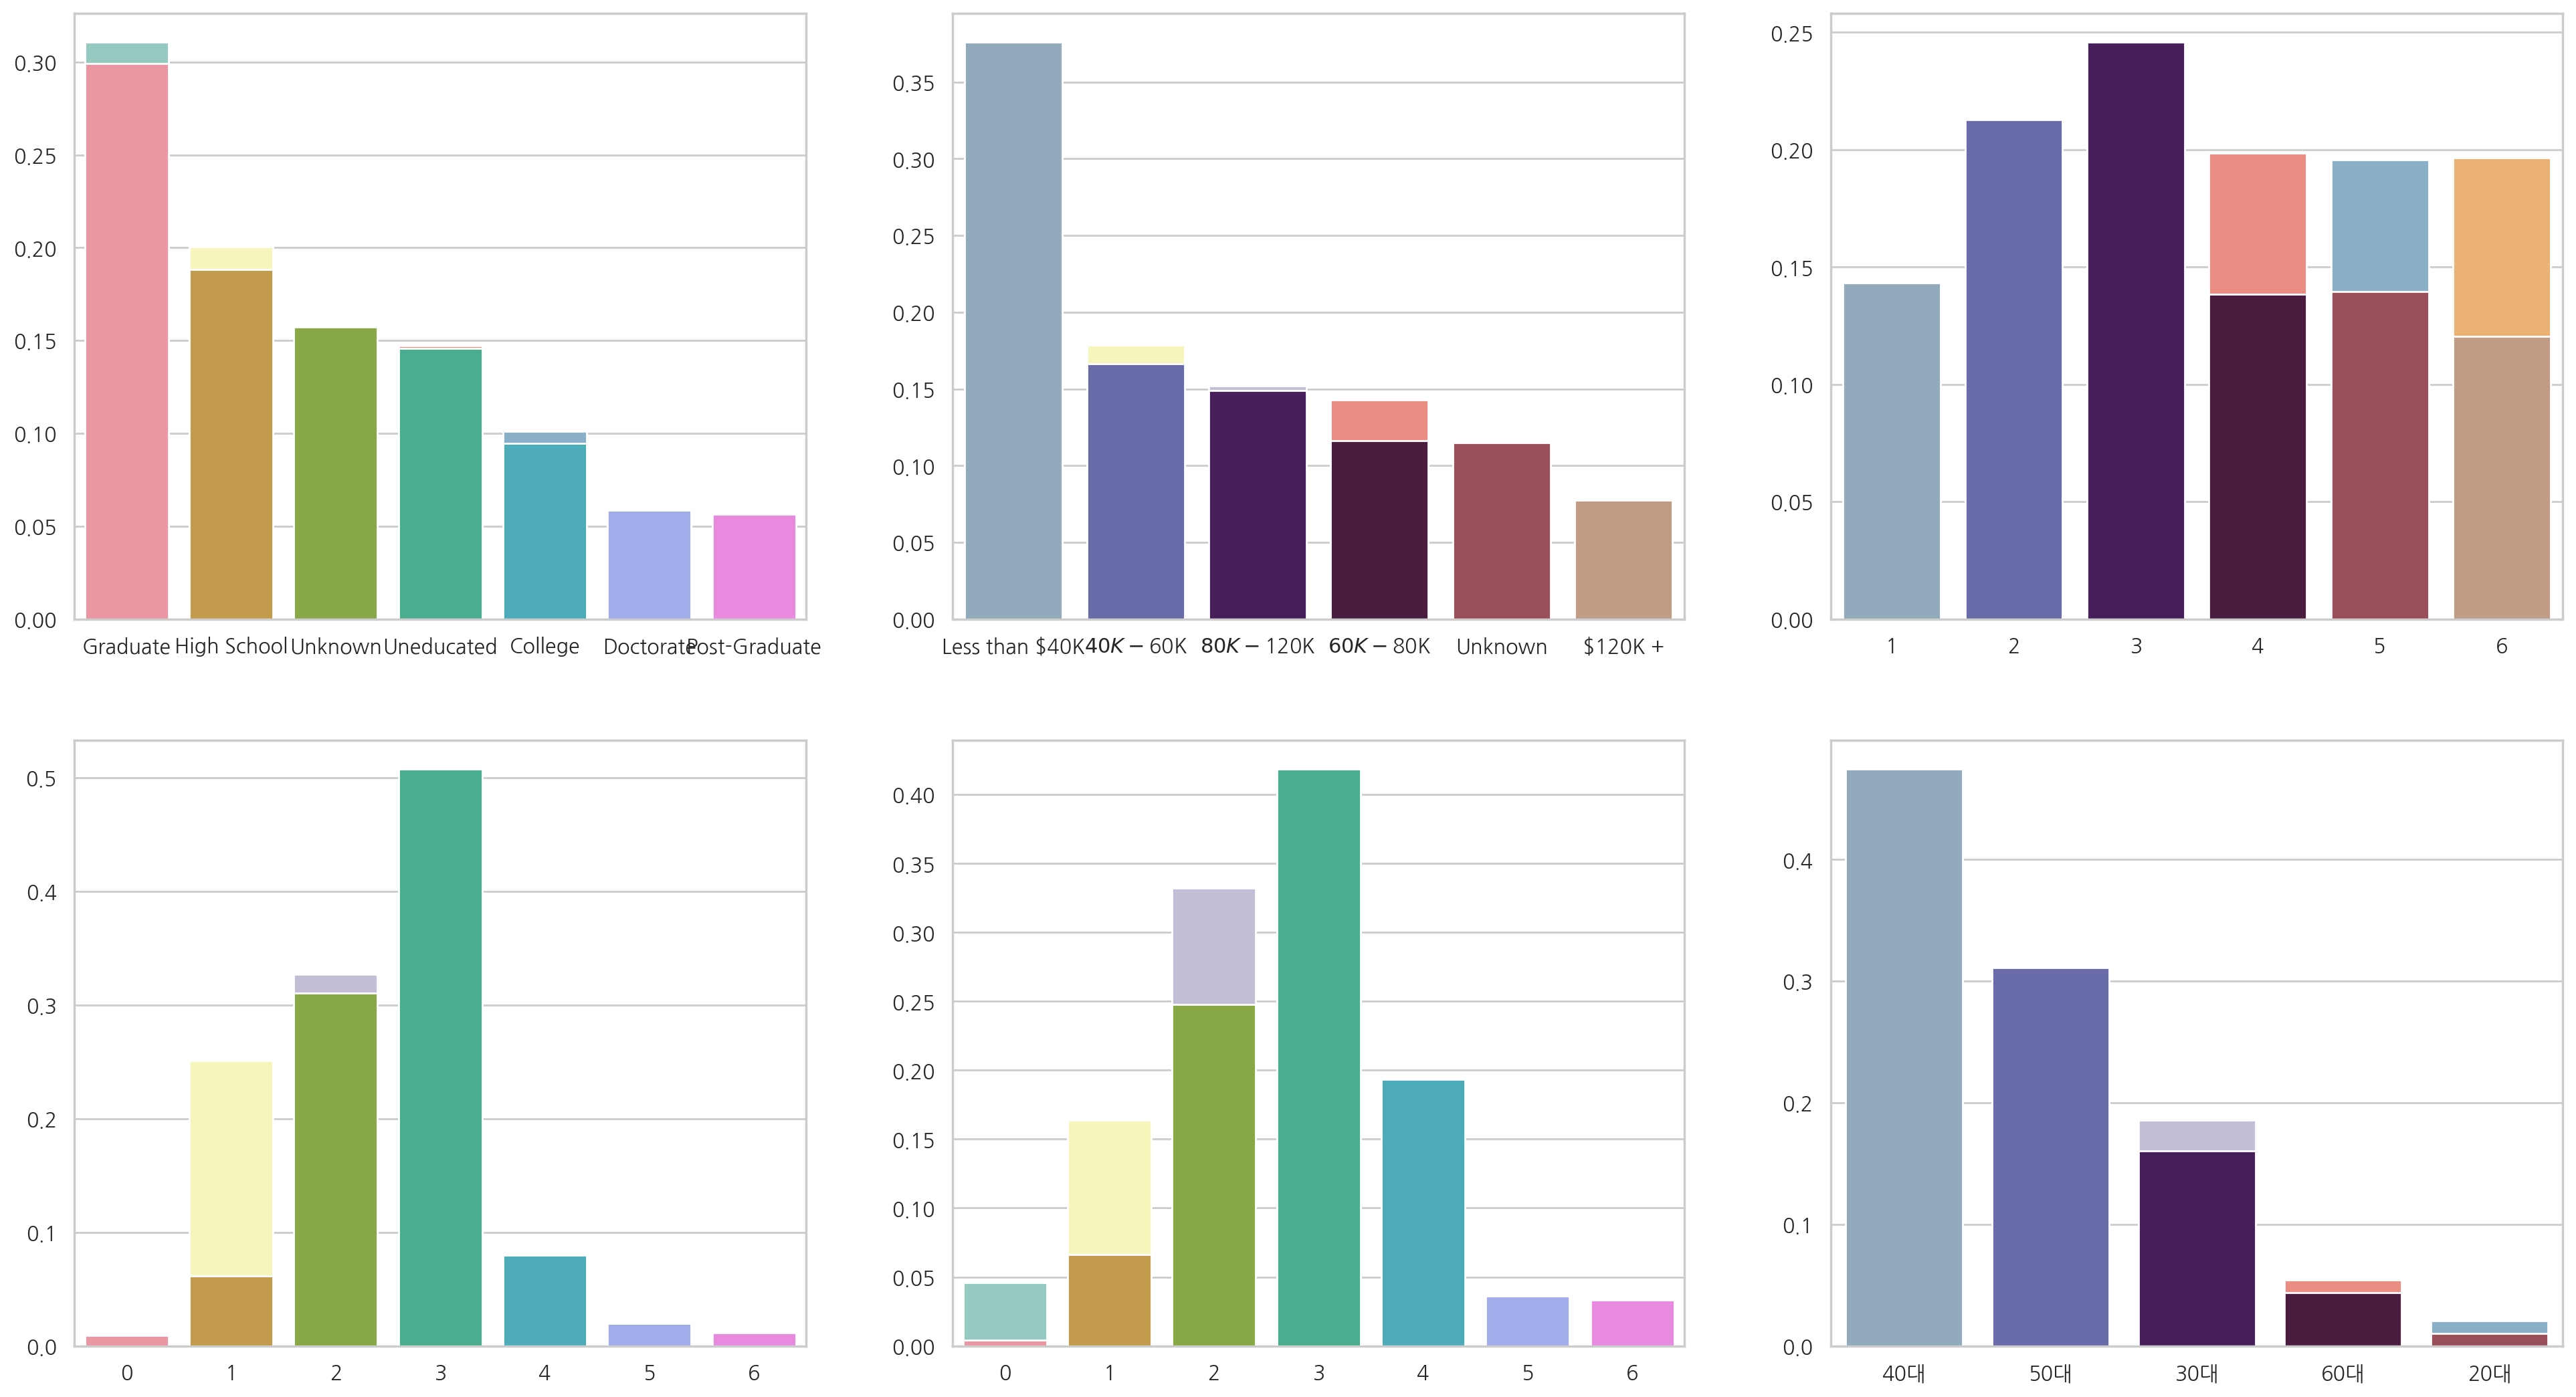

In [ ]:
#for 문을 이용해서 subplot를 자동화하여 만들기, 미이탈자 그룹과 이탈자 그룹과 합쳐서 절대적으로 비교해보고 싶어서 이렇게 그림.

li = ['학력','소득유형','보유은행상품수','비활성개월수','은행컨택횟수','나이대']

plt.figure(figsize=(24,20))
for i in range(len(li)):
  plt.subplot(3,3,i+1)
  temp1 = exist[li[i]].value_counts(normalize=True).to_frame()
  temp2 = attrited[li[i]].value_counts(normalize=True).to_frame()
  sns.barplot(data=temp1, x=temp1.index, y=temp1[li[i]].values, palette='Set3')
  sns.barplot(data=temp2, x=temp2.index, y=temp2[li[i]].values)


1. 신용카드 이탈자들은 학력에 따라서 이탈률이 크게 달라지지는 않는 것같다. (비율로 본 결과 거의 미이탈자들과 비율이 유사함)
2. 소득유형에 있어서는 이탈자들은 40k보다 적은 사람이 35%이상이다. 뿐만 아니라 unknown과 120k+ 이상인 사람이 비이탈자보다 비율이 높다.
3. 이탈자들의 은행가입상품은 1~3개가 가장 많으며, 4~6개의 비율은 미이탈자보다 낮다.
4. 이탈자들은 비활성개월수는 3개월 수가 50%로 가장 많으며 2개월은 30%정도로 그 다음 가장 많다. 반면, 미이탈자들의 비활성개월수는 1개월과 2개월에서 많이 차지하고있다.
5. 이탈자들은 미이탈자들에 비해 은행의 컨택횟수가 굉장히 많다.
0~2회(약 30% 가량),3회 이상(40%),4회 이상(약 18%),5~6회(약 8%)
6. 이탈자와 미이탈자는 연령대의 차이가 딱히 있진 않다.

--> 소득 유형은 이탈률에 영향을 줄 수 있는 변수일 수도 있다.

--> 은행가입상품의 개수는 신용카드의 이탈에 영향을 줄 수 있는 변수일 수도 있다.

--> 은행의 컨택횟수는 신용카드의 이탈에 영향을 줄 수 있는 변수일 수도 있다.


In [ ]:
#막대그래프 상 이탈자가 좀 더 높게 나타났던 것들을 검증, 소득유형과 비활성개월 수
#이탈자와 비이탈자의 소득 유형 상에는 큰 차이가 없었으나, 이탈자와 비이탈자는 비활성 3개월 이상부터 차이가 많이 났다..
print(exist.value_counts('소득유형', normalize=True))
print(attrited.value_counts('소득유형', normalize=True))

print(exist.value_counts('비활성개월수', normalize=True))
print(attrited.value_counts('비활성개월수', normalize=True))

소득유형
Less than $40K    0.346941
$40K - $60K       0.178706
$80K - $120K      0.152118
$60K - $80K       0.142706
Unknown           0.108824
$120K +           0.070706
dtype: float64
소득유형
Less than $40K    0.376152
$40K - $60K       0.166564
$80K - $120K      0.148740
$60K - $80K       0.116165
Unknown           0.114935
$120K +           0.077443
dtype: float64
비활성개월수
3    0.355294
2    0.326706
1    0.250941
4    0.035882
5    0.017176
6    0.012353
0    0.001647
dtype: float64
비활성개월수
3    0.507683
2    0.310387
4    0.079902
1    0.061463
5    0.019668
6    0.011678
0    0.009219
dtype: float64


이탈자그룹은 미이탈자그룹보다 보유은행상품수가 3개 이하로 가지고 있는 사람,  비활성개월수가 3개월 이상인 사람, 은행컨택횟수가 3번 이상인사람이 제일 많았다.

# 결론
# 1. ***리볼빙 금액을 못 갚은 것 아닐까?? 카드 리볼빙에 대한 부담이 너무 컸던 것 아닐까?***
# -> 아직 모름


#2. ***은행의 비활성개월수의 수가 크지 않을까?***
# -> 이탈자 집단이 비활성개월의 수가 3개월 이상인 사람들이 70% 이상으로 엄청 많긴함. 하지만 0,1 개월인 사람도 있는 걸 봐서는 좀 봐야할 듯.
#3. ***평균 카드 사용률이 낮지 않을까?***
# -> 낮고 그룹간 차이가 나는 것도 유의미하게 나타났음. 그룹 간에 카드사용률이 왜 낮은지에 대한 이유는 모르겠음.. (이 데이터를 통해 알수 있는 방법이 있다면 알고싶습니다.)
# 4. ***소득유형이 낮아서 카드를 비활성화 하지 않을까?***
# -> 그래프 상 이탈자그룹이 less than 40k 그룹에서 높게 나타났지만, 찾아보니깐 비슷함.

#1. 박스플롯에서 중간값이 안뜨는 경우는 무엇인가?
#2. 다음과 같은 이탈자, 미이탈자 집단 간의 t-test를 진행하였을 때, 어떤 t-test를 진행하여야하는가? 아니면 anova를 사용해야하는건가? (독립표본 t검정, 대응표본 t검정 등) <t테스트는 같은 모집단에서 나온 것이 아닌 독립 표본이어야함>